<a href="https://colab.research.google.com/github/divyanimaharana26/Titanic-Prediction/blob/main/Titanic_Kaggle_Competion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Train data

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/dataset/Project/DATA/titanic/train.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data cleaning

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train=train.drop(['Cabin','Name','Ticket','Embarked'],axis=1)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
train['Age']=train.fillna(train.median())

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

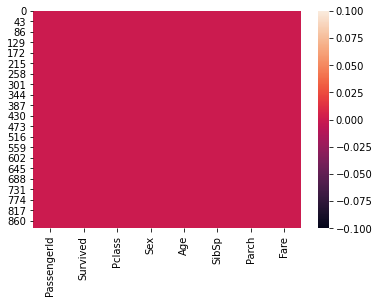

In [ ]:
sns.heatmap(train.isnull())

Handling the categorical data

In [ ]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,1,1,0,7.2500
1,2,1,1,female,2,1,0,71.2833
2,3,1,3,female,3,0,0,7.9250
3,4,1,1,female,4,1,0,53.1000
4,5,0,3,male,5,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,887,0,0,13.0000
887,888,1,1,female,888,0,0,30.0000
888,889,0,3,female,889,1,2,23.4500
889,890,1,1,male,890,0,0,30.0000


In [ ]:
cols=train.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])

In [ ]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,1,1,0,7.2500
1,2,1,1,0,2,1,0,71.2833
2,3,1,3,0,3,0,0,7.9250
3,4,1,1,0,4,1,0,53.1000
4,5,0,3,1,5,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,887,0,0,13.0000
887,888,1,1,0,888,0,0,30.0000
888,889,0,3,0,889,1,2,23.4500
889,890,1,1,1,890,0,0,30.0000


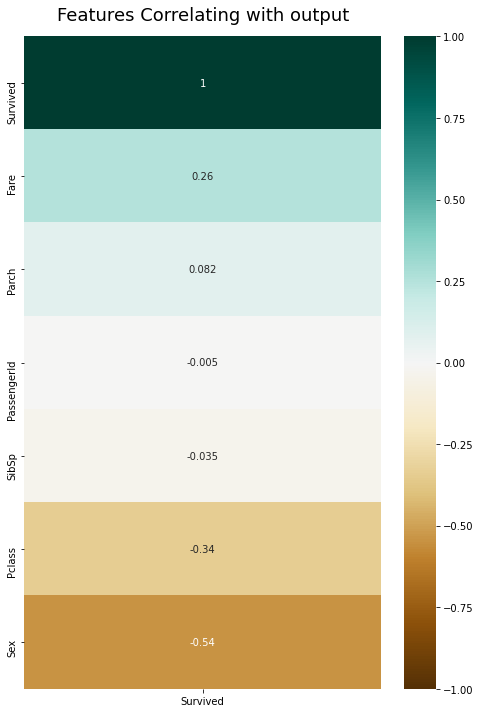

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with output', fontdict={'fontsize':18}, pad=16);

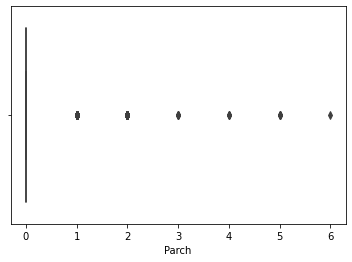

In [ ]:
sns.boxplot(x='Parch',data=train)

Laoding Test Data

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/dataset/Project/DATA/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test=test.drop(['Cabin','Name','Ticket','Embarked'],axis=1)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500
414,1306,1,female,39.0,0,0,108.9000
415,1307,3,male,38.5,0,0,7.2500
416,1308,3,male,NaN,0,0,8.0500


In [ ]:
test['Age']=test.fillna(test.median())
test['Fare']=test.fillna(test.median())

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [ ]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,892,0,0,892
1,893,3,female,893,1,0,893
2,894,2,male,894,0,0,894
3,895,3,male,895,0,0,895
4,896,3,female,896,1,1,896
...,...,...,...,...,...,...,...
413,1305,3,male,1305,0,0,1305
414,1306,1,female,1306,0,0,1306
415,1307,3,male,1307,0,0,1307
416,1308,3,male,1308,0,0,1308


Handling Categorical data

In [ ]:
test['Sex']=le.fit_transform(test['Sex'])

In [ ]:
test=test.drop(['Age'],axis=1)
test

,PassengerId,Pclass,Sex,SibSp,Parch,Fare
0,892,3,1,0,0,892
1,893,3,0,1,0,893
2,894,2,1,0,0,894
3,895,3,1,0,0,895
4,896,3,0,1,1,896
...,...,...,...,...,...,...
413,1305,3,1,0,0,1305
414,1306,1,0,0,0,1306
415,1307,3,1,0,0,1307
416,1308,3,1,0,0,1308


In [ ]:
test=test.drop(['Fare'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X=train.drop(['Survived'],axis=1)

In [ ]:
y=train['Survived']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((712, 7), (712,), (179, 7), (179,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr=LogisticRegression(C=100)
lr.fit(X_train_sc,y_train)
lr.score(X_test_sc,y_test)

0.7653631284916201

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=20,splitter='best')
dt.fit(X_train_sc,y_train)

dt.score(X_test_sc,y_test)

0.6983240223463687

In [ ]:
knc=KNeighborsClassifier(n_neighbors=250)
knc.fit(X_train_sc,y_train)

knc.score(X_test_sc,y_test)

0.7318435754189944

In [ ]:
svc=SVC(C=6,kernel='linear',degree=10,gamma='auto')
svc.fit(X_train_sc,y_train)

svc.score(X_test_sc,y_test)

0.7821229050279329

In [ ]:
nb=GaussianNB()
nb.fit(X_train_sc,y_train)
nb.score(X_test_sc,y_test)

0.7597765363128491

In [ ]:
rf=RandomForestClassifier(n_estimators=400,criterion='gini',max_depth=10)
rf.fit(X_train_sc,y_train)
rf.score(X_test_sc,y_test)

0.7821229050279329

In [ ]:
features=test.columns
features

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch'], dtype='object')

In [ ]:
rf_predict=rf.predict(test[features])

ValueError: ignored

In [ ]:
rf_predict

In [ ]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived':rf_predict})
output.to_csv('submission2.csv', index=False)